#### KNN Model
n = 7
  
Accuracy = 55%

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv("../Data/combind_sen_stock.csv")
df.head()


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Label,Tweets_clean_more,polarity,subjectivity,sentiment,half_H_L
0,0,2011-12-01,2.171333,2.266000,2.132000,2.173333,2.173333,15453000,Increase,i made volum model s go now i need work miniat...,0.300000,0.200000,positive,1.200000
1,1,2011-12-21,1.860667,1.871333,1.735333,1.838000,1.838000,25582500,Decrease,yeah realli mom attest not sure i handl char m...,0.377273,0.708687,positive,1.003667
2,2,2011-12-22,1.840000,1.870000,1.820000,1.851333,1.851333,15141000,Increase,model s option perform red black i deliv car j...,0.090476,0.376190,positive,0.960000
3,3,2011-12-28,1.932667,1.949333,1.869333,1.900667,1.900667,8628000,Decrease,if ever want know real truth moon land best on...,0.600000,0.300000,positive,1.014666
4,4,2011-12-29,1.906000,1.956000,1.903333,1.915333,1.915333,7323000,Increase,cool person essay it realli reson i felt way c...,0.132857,0.438571,positive,1.004333


In [107]:
df = df[["Date","sentiment","Volume","subjectivity","polarity","Adj Close","Label"]]
df = df.replace({'positive':1,'negative':-1,'neutral':0,'Increase':1,'Decrease':-1,'No Change':0})
df.set_index("Date",inplace= True)
df.head()

,sentiment,Volume,subjectivity,polarity,Adj Close,Label
Date,,,,,,
2011-12-01,1,15453000,0.200000,0.300000,2.173333,1
2011-12-21,1,25582500,0.708687,0.377273,1.838000,-1
2011-12-22,1,15141000,0.376190,0.090476,1.851333,1
2011-12-28,1,8628000,0.300000,0.600000,1.900667,-1
2011-12-29,1,7323000,0.438571,0.132857,1.915333,1


In [108]:
x = df.drop(columns = "Label")
y = df["Label"]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state=123)

Model report: n =  1
Accuracy score:  0.47368421052631576


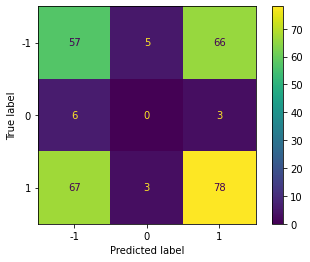



Model report: n =  3
Accuracy score:  0.5087719298245614


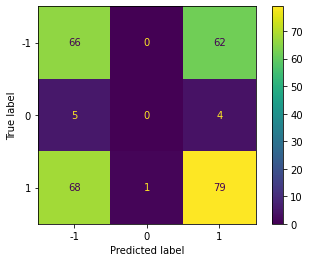



Model report: n =  5
Accuracy score:  0.5228070175438596


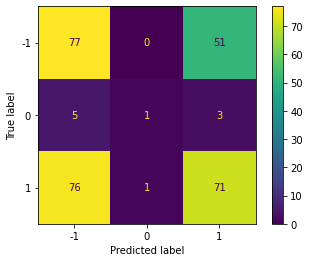



Model report: n =  7
Accuracy score:  0.5473684210526316


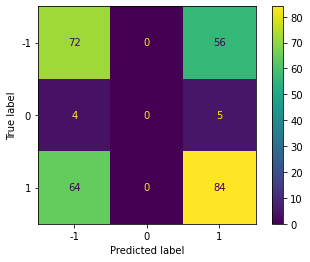



Model report: n =  9
Accuracy score:  0.519298245614035


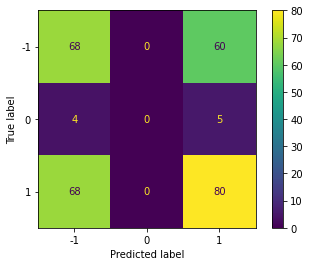



Model report: n =  11
Accuracy score:  0.49473684210526314


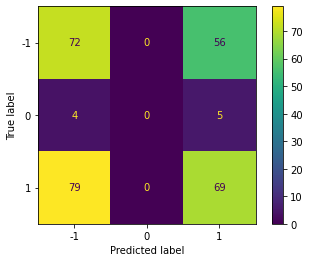



Model report: n =  13
Accuracy score:  0.519298245614035


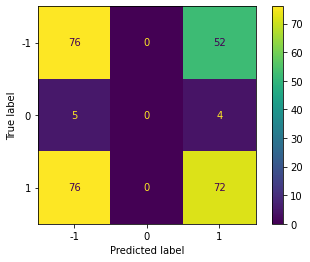



Model report: n =  15
Accuracy score:  0.5052631578947369


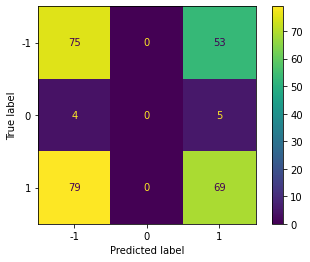



Model report: n =  17
Accuracy score:  0.512280701754386


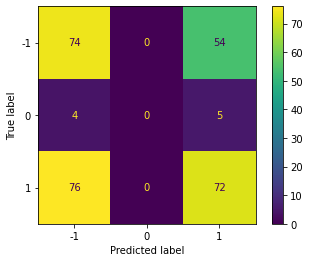



Model report: n =  19
Accuracy score:  0.5017543859649123


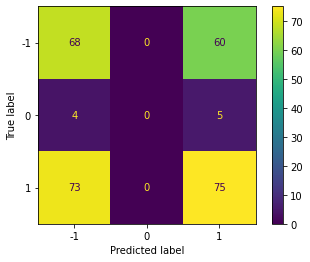



Model report: n =  21
Accuracy score:  0.512280701754386


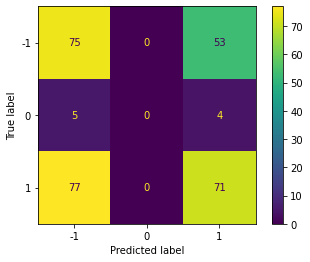

In [109]:
neighbors =[i for i in range(1,22,2)]
for n in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n,p=1) # manhattan distance
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
    print("Model report: n = ",n)
    print("Accuracy score: ",acc)
    disp.plot()
    plt.show()
    print("\n")


Model report: n =  1
Accuracy score:  0.4807017543859649


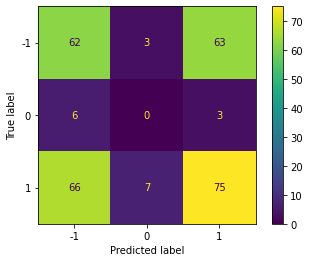



Model report: n =  3
Accuracy score:  0.4807017543859649


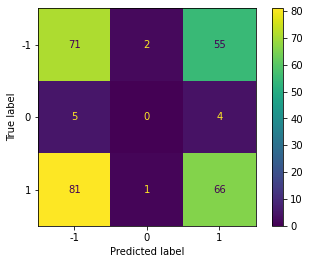



Model report: n =  5
Accuracy score:  0.4807017543859649


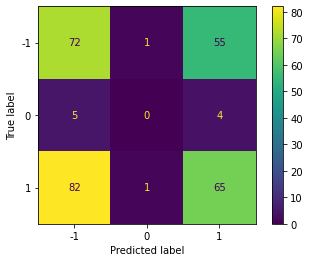



Model report: n =  7
Accuracy score:  0.47017543859649125


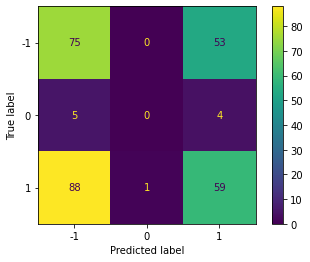



Model report: n =  9
Accuracy score:  0.45964912280701753


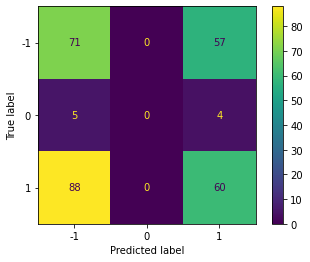



Model report: n =  11
Accuracy score:  0.45263157894736844


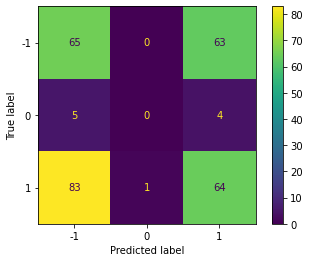



Model report: n =  13
Accuracy score:  0.47719298245614034


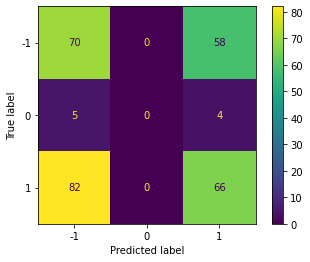



Model report: n =  15
Accuracy score:  0.4666666666666667


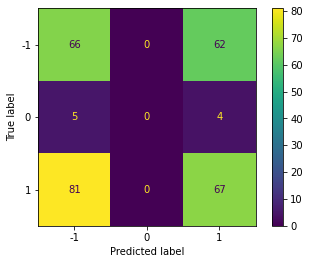



Model report: n =  17
Accuracy score:  0.47719298245614034


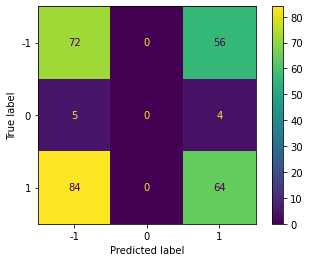



Model report: n =  19
Accuracy score:  0.49122807017543857


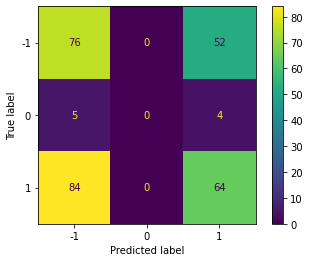



Model report: n =  21
Accuracy score:  0.47719298245614034


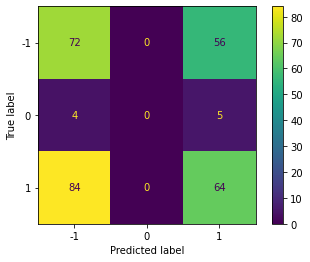

In [104]:
neighbors =[i for i in range(1,22,2)]
for n in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n,p=2) #euclidean distance
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
    print("Model report: n = ",n)
    print("Accuracy score: ",acc)
    disp.plot()
    plt.show()
    print("\n")